In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")


In [7]:
tickers = ["AAPL", "MSFT", "TSLA"]

df = yf.download(tickers, start="2022-01-01", end="2023-01-01")
print(df.columns)

data = yf.download(tickers, start="2022-01-01", end="2023-01-01")["Close"]
data


C:\Users\siddh\AppData\Local\Temp\ipykernel_6576\4289989415.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2022-01-01", end="2023-01-01")
[*********************100%***********************]  3 of 3 completed
C:\Users\siddh\AppData\Local\Temp\ipykernel_6576\4289989415.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2022-01-01", end="2023-01-01")["Close"]
[*********************100%***********************]  3 of 3 completed

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'MSFT'),
            ( 'Close', 'TSLA'),
            (  'High', 'AAPL'),
            (  'High', 'MSFT'),
            (  'High', 'TSLA'),
            (   'Low', 'AAPL'),
            (   'Low', 'MSFT'),
            (   'Low', 'TSLA'),
            (  'Open', 'AAPL'),
            (  'Open', 'MSFT'),
            (  'Open', 'TSLA'),
            ('Volume', 'AAPL'),
            ('Volume', 'MSFT'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


Ticker,AAPL,MSFT,TSLA
Date,,,
2022-01-03,178.270294,323.898376,399.926666
2022-01-04,176.007782,318.344482,383.196655
2022-01-05,171.326004,306.123901,362.706665
2022-01-06,168.466003,303.704956,354.899994
2022-01-07,168.632492,303.859741,342.320007
...,...,...,...
2022-12-23,129.900269,233.155502,123.150002
2022-12-27,128.097504,231.426849,109.099998
2022-12-28,124.166786,229.053574,112.709999


In [8]:
returns = data.pct_change().dropna()
returns.head()


Ticker,AAPL,MSFT,TSLA
Date,,,
2022-01-04,-0.012691,-0.017147,-0.041833
2022-01-05,-0.026600,-0.038388,-0.053471
2022-01-06,-0.016693,-0.007902,-0.021523
2022-01-07,0.000988,0.000510,-0.035447
2022-01-10,0.000116,0.000732,0.030342


In [9]:
variance = returns.var()
std_dev = returns.std()

variance, std_dev


(Ticker
 AAPL    0.000505
 MSFT    0.000497
 TSLA    0.001694
 dtype: float64,
 Ticker
 AAPL    0.022471
 MSFT    0.022289
 TSLA    0.041155
 dtype: float64)

In [10]:
annual_variance = variance * 252
annual_vol = std_dev * np.sqrt(252)

annual_variance, annual_vol


(Ticker
 AAPL    0.127250
 MSFT    0.125191
 TSLA    0.426830
 dtype: float64,
 Ticker
 AAPL    0.356721
 MSFT    0.353823
 TSLA    0.653322
 dtype: float64)

In [11]:
cov_matrix = returns.cov()
cov_matrix


Ticker,AAPL,MSFT,TSLA
Ticker,,,
AAPL,0.000505,0.000413,0.000589
MSFT,0.000413,0.000497,0.000517
TSLA,0.000589,0.000517,0.001694


In [12]:
corr_matrix = returns.corr()
corr_matrix


Ticker,AAPL,MSFT,TSLA
Ticker,,,
AAPL,1.000000,0.824902,0.637218
MSFT,0.824902,1.000000,0.563946
TSLA,0.637218,0.563946,1.000000


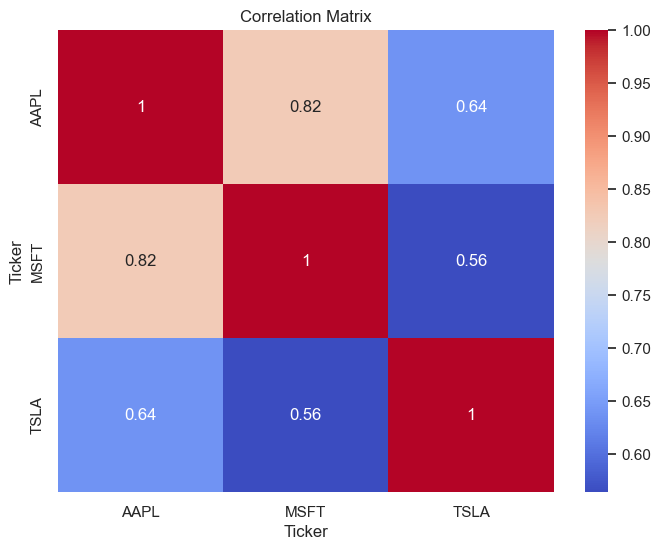

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [16]:
for t in tickers:
    r = returns[t].dropna()
    t_stat, p_value = stats.ttest_1samp(r, 0)
    print(f"{t} → t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")


AAPL → t-stat = -0.7553, p-value = 0.4508
MSFT → t-stat = -0.7438, p-value = 0.4577
TSLA → t-stat = -1.4782, p-value = 0.1406


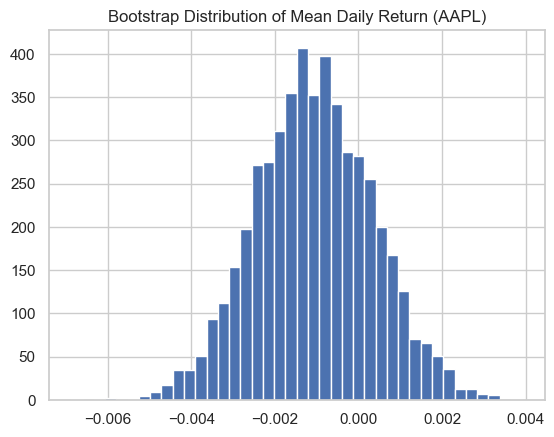

In [19]:
def bootstrap_mean(data, n_boot=5000):
    means = []
    for _ in range(n_boot):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(sample.mean())
    return np.array(means)

boot_means = bootstrap_mean(returns["AAPL"])
plt.hist(boot_means, bins=40)
plt.title("Bootstrap Distribution of Mean Daily Return (AAPL)")
plt.show()


In [22]:
for t in tickers:
    r = returns[t].dropna()
    t_stat, p_value = stats.ttest_1samp(r, 0, alternative = 'greater')
    print(f"{t} → t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

AAPL → t-stat = -0.7553, p-value = 0.7746
MSFT → t-stat = -0.7438, p-value = 0.7711
TSLA → t-stat = -1.4782, p-value = 0.9297


In [26]:
w = np.array([1/3, 1/3, 1/3])
var = data.var()
var

Ticker
AAPL     160.140213
MSFT     596.780969
TSLA    3342.499811
dtype: float64

In [27]:
returns["TSLA"].kurtosis()


np.float64(0.1540573822127267)